f

f

In [26]:
from PIL import Image
from torch.nn.functional import conv2d, avg_pool2d, avg_pool3d, max_pool2d
from torchvision.transforms.functional import pil_to_tensor, rgb_to_grayscale
from torchvision.utils import save_image
from torch.distributions import MultivariateNormal
import torch 

img = (pil_to_tensor(Image.open('facades/image_495.jpg'))[:, :, :256]).unsqueeze(0)/255
img.shape

torch.Size([1, 3, 256, 256])

In [24]:
k = 17
img = rgb_to_grayscale(img)
var = max_pool2d(img, kernel_size=k, stride=1, padding=k//2) \
        + max_pool2d(-img, kernel_size=k, stride=1, padding=k//2)
var += gaussian2d(256, 256).unsqueeze(0)
k = 11
var = max_pool2d(var, kernel_size=k, stride=1, padding=k//2)
var = (var-var.min())/(var.max()-var.min())
save_image(torch.cat([img, var], -1), 'prueba.jpg')


torch.Size([1, 1, 256, 256])

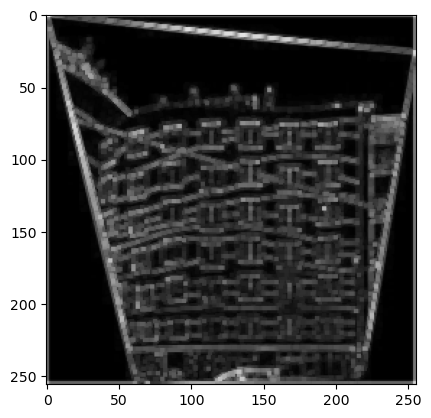

In [65]:
from typing import Tuple
import numpy as np

def gaussian2d(
        height: int, 
        width: int, 
        mean: Tuple[float, float] = (0.0, 0.0), 
        std: Tuple[float, float] = (0.4, 0.4)
    ):
    gaus = lambda x, y: np.exp(-(((x-mean[0])**2)/(2*std[0]**2) + ((y-mean[1])**2)/(2*std[1]**2)))
    x = torch.zeros(height, width)
    for h in range(height):
        i = h/height-0.5
        for w in range(width):
            j = w/width-0.5
            x[h, w] = gaus(i, j)
    return x 

import matplotlib.pyplot as plt

laplacian5 = torch.tensor([
    [0, 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 16, -2, -1],
    [0, -1, -2, -1, 0],
    [0, 0, -1, 0, 0],
], dtype=torch.float32)

res = max_pool2d(conv2d(img, laplacian5.unsqueeze(0).repeat(3,1,1).unsqueeze(0), padding=2).abs(), kernel_size=3, stride=1, padding=1)
res = (res-res.min())/(res.max()-res.min())
plt.imshow(res[0][0], cmap='gray')
res.shape

In [44]:
res

tensor([[[[-56.6000, -61.5412, -61.1647,  ..., -33.3882, -33.3882, -33.6784],
          [-55.1530, -63.2353, -63.7765,  ..., -33.3882, -33.3882, -33.6784],
          [-51.6353, -62.2000, -63.8118,  ..., -33.3882, -33.3882, -33.6784],
          ...,
          [-33.3882, -33.3882, -33.3882,  ..., -33.3882, -33.3882, -33.6784],
          [-33.3882, -33.3882, -33.3882,  ..., -33.3882, -33.3882, -33.6784],
          [-33.3882, -33.3882, -33.3882,  ..., -33.3882, -33.3882, -33.6784]]]])

In [128]:
m = MultivariateNormal(torch.zeros(256,256), torch.eye(256)).sample().unsqueeze(0)
m.shape

torch.Size([1, 256, 256])

In [129]:
img.shape

torch.Size([1, 1, 256, 256])

In [33]:
net(inputs).max()

tensor(1., grad_fn=<MaxBackward1>)